# Evaluation: Precision & Recall

Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics.

We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 

In [176]:
# Libraries
from sklearn.datasets import fetch_openml
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics


from sklearn.linear_model import LogisticRegression


In [65]:
# Load data
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

#### Now take a look at the shapes of the X and y matrices.

In [66]:
# your code here
X.shape

(70000, 784)

In [67]:
y.shape

(70000,)

#### Let's pick one entry and see what number is written. Use indexing to pick the 36000th digit.

In [68]:
# your code here

X[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

####  Use the *reshape(28,28)* method and *plt.imshow()* function with the parameters *cmap = matplotlib.cm.binary* and *interpolation="nearest"* to make a plot of the number. Be sure to import matplotlib.

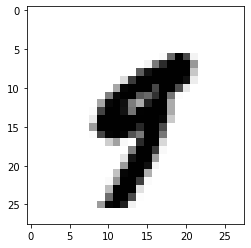

In [69]:
# your code here


X_2 = X[[36000]].reshape(28, 28)

plt.imshow(X_2, cmap = plt.cm.binary, interpolation='nearest')
plt.show()

#### Use indexing to see if what the plot shows matches with the outcome of the 36000th index.

In [70]:
# your code here

y[36000]


'9'

#### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training and the rest for testing.

In [71]:
# your code here

X_train = X[0:60000]
x_test = X[60001:]

y_train = y[0:60000]
y_test = y[60001:]


#### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5.

In [78]:
# your code here

y5_train = np.where(y_train == '5', 1, 0)
y5_test = np.where(y_test == '5', 1, 0)


In [79]:
y5_test

array([0, 0, 0, ..., 0, 1, 0])

#### Lets train a logistic regression to predict if a number is a 5 or not. Remember to use the 'just 5s' target train array.

In [133]:
# your code here

model = LogisticRegression().fit(X_train, y5_train)

C:\Users\anete\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Does the classifier predict correctly the 36000th digit we picked before?

In [134]:
# your code here

y_pred_test_lr = model.predict(X_train)
y_pred_test_lr[36000]

0

In [ ]:
# your comments here

# The classifier predicted correctly that the 36000th digit was not 5.

#### The 35th value is a 5. Check if it was correctly predicted.

In [97]:
# your code here

y_pred_test_lr = model.predict(X_train)
y_pred_test_lr[35]

1

In [ ]:
# your comments here

# The classifier predicted correctly that the 35th digit was 5.

#### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below.

In [98]:
# Libraries
from sklearn.base import BaseEstimator

In [165]:
# Dumb classifier
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1))[:, 0]
    

never_5_clf = Never5Classifier()
never_5_clf.fit(X_train)

#### Now lets fit and predict on the testing set using our dumb classifier.

In [167]:
# your code here

#never_5_clf = Never5Classifier().fit(X_train)
y_pred_test_never = never_5_clf.predict(x_test)
y_pred_test_never

array([0., 0., 0., ..., 0., 0., 0.])

#### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [143]:
y_pred_test_lr = model.predict(x_test)

In [175]:
# your code here

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("\nLogistic Regresssion\nConfusion matrix:\n",confusion_matrix(y5_test, y_pred_test_lr))
print('Precision score',precision_score(y5_test, y_pred_test_lr))
print('Recall score',recall_score(y5_test, y_pred_test_lr))
print('F-1 score',f1_score(y5_test, y_pred_test_lr))


print("\n\nNever5Classifier\nConfusion matrix:\n",confusion_matrix(y5_test, y_pred_test_never))
print('Precision score',precision_score(y5_test, y_pred_test_never))
print('Recall score',recall_score(y5_test, y_pred_test_never))
print('F-1 score',f1_score(y5_test, y_pred_test_never))


Logistic Regresssion
Confusion matrix:
 [[9026   81]
 [ 145  747]]
Precision score 0.9021739130434783
Recall score 0.8374439461883408
F-1 score 0.8686046511627907


Never5Classifier
Confusion matrix:
 [[9107    0]
 [ 892    0]]
Precision score 0.0
Recall score 0.0
F-1 score 0.0


C:\Users\anete\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anete\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


#### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
# your answer here

# Based on Precision, Recall and F1 scores, the Logistic Regresssion model is better than Never5Classifier model.
# There were 892 False Positive predictions with Never5Classifier, with Logistic Regresssion - only 145.

#### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each.

Text(0.5, 1.0, 'Never5Classifier model')

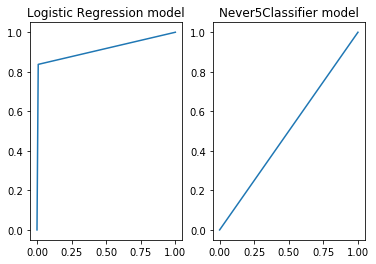

In [186]:
# your code here

fpr_1, tpr_1, dummy_1 = metrics.roc_curve(y5_test, y_pred_test_lr)
fpr_2, tpr_2, dummy_2 = metrics.roc_curve(y5_test, y_pred_test_never)

fig, ax = plt.subplots(1, 2)
ax[0].plot(fpr_1, tpr_1)
ax[0].set_title('Logistic Regression model')
ax[1].plot(fpr_2, tpr_2)
ax[1].set_title('Never5Classifier model')


#### Now find the roc_auc_score for each. 

In [191]:
# your code here

auc_lr = metrics.roc_auc_score(y5_test, y_pred_test_lr)
auc_never = metrics.roc_auc_score(y5_test, y_pred_test_never)

print('Logistic Regression model AUC score:', auc_lr)
print('Never5Classifier model AUC score:', auc_never)

Logistic Regression model AUC score: 0.9142748445117613
Never5Classifier model AUC score: 0.5


#### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
# your answer here

# Logistic Regression model (AUC score 0.91) works better than Never5Classifier model (AUC score 0.5)
